**Credit Card Fraud Detection**

Build a model to detect fraudulent credit card transactions. Use a
 dataset containing information about credit card transactions, and
 experiment with algorithms like Logistic Regression, Decision Trees,
 or Random Forests to classify transactions as fraudulent or
 legitimate.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load datasets
train_df = pd.read_csv("fraudTrain.csv")
test_df = pd.read_csv("fraudTest.csv")

In [4]:
# Combine both
df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

In [5]:
# Drop unnecessary columns
cols_to_drop = ['trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'dob', 'trans_num', 'unix_time', 'merchant']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [6]:
# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

In [7]:
# Define X and y
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

In [8]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Remove rows with NaN values in y
nan_indices = y.isna()
X_scaled_cleaned = X_scaled[~nan_indices]
y_cleaned = y[~nan_indices]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_cleaned, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned)

In [11]:
# Models
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

In [12]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

In [13]:
forest_model = RandomForestClassifier(n_estimators=100)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

In [14]:
# Evaluation
def evaluate(name, y_true, y_pred):
    print(f"------ {name} ------")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_pred))

In [15]:
evaluate("Logistic Regression", y_test, log_pred)
evaluate("Decision Tree", y_test, tree_pred)
evaluate("Random Forest", y_test, forest_pred)

------ Logistic Regression ------
Confusion Matrix:
 [[3104    6]
 [   4    9]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3110
         1.0       0.60      0.69      0.64        13

    accuracy                           1.00      3123
   macro avg       0.80      0.85      0.82      3123
weighted avg       1.00      1.00      1.00      3123

ROC-AUC Score: 0.8451892159287658
------ Decision Tree ------
Confusion Matrix:
 [[3108    2]
 [   5    8]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3110
         1.0       0.80      0.62      0.70        13

    accuracy                           1.00      3123
   macro avg       0.90      0.81      0.85      3123
weighted avg       1.00      1.00      1.00      3123

ROC-AUC Score: 0.8073707642839476
------ Random Forest ------
Confusion Matrix:
 [[3109    1]
 [   8    5]]


In [16]:
# SMOTE for imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [17]:
rf_sm = RandomForestClassifier(n_estimators=100)
rf_sm.fit(X_res, y_res)
sm_pred = rf_sm.predict(X_test)

In [18]:
evaluate("Random Forest + SMOTE", y_test, sm_pred)

------ Random Forest + SMOTE ------
Confusion Matrix:
 [[3108    2]
 [   7    6]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3110
         1.0       0.75      0.46      0.57        13

    accuracy                           1.00      3123
   macro avg       0.87      0.73      0.78      3123
weighted avg       1.00      1.00      1.00      3123

ROC-AUC Score: 0.7304476873608707


In [19]:
# Feature importance
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": forest_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

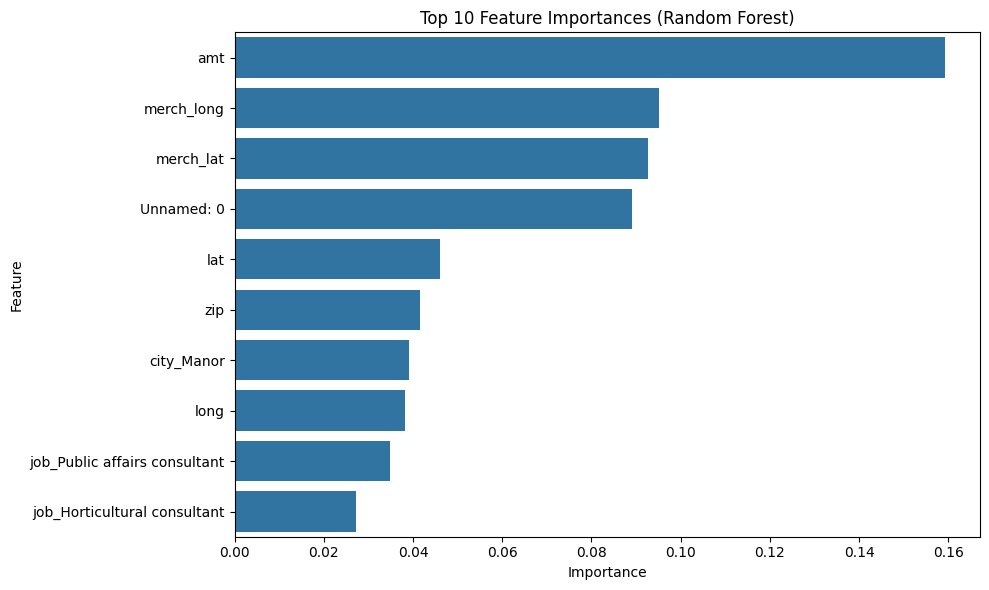

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp.head(10), x="Importance", y="Feature")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()